# CLUSTER ANALYSIS

Cluster analysis is a multivariate statistical technique that groups observation on the basis of some of their features or variables they are described by.
The goal of clustering is to maximize the similarity of observation within a cluster and maximize dissimilarity between clusters.

It is useful in exploring data to identify patterns.

##### HOW IS CLUSTERING DIFFERENT FROM CLASSIFICATION?
In classification we predict an output category from a given input data where as in clustering we group data points together based on similarities among them and difference from others.


## IMport the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

In [2]:
data = pd.read_csv("3.12. Example.csv")
# Loading the dataset in a variable called data

In [3]:
data
# dataset preview

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

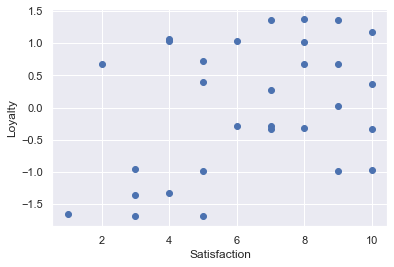

In [4]:
# creating a scatter plot for our data.
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [5]:
x = data.copy()
# selecting our input features for applying clustering.


## Clustering

### K-MEANS CLUSTERING
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

###### WORKING OF KMEANS
1) Choose the number of clusters.
2) Specify cluster seeds ( A seed is basically a starting centroid) chosen at random or specified in prior.
3) Assign each part to a centroid.( using euclidean distance
4) Adjust the centroids.
5) Repeat 3 & 4 until final results.

In [18]:
kmeans = KMeans(2)
kmeans.fit(x)
# USING 2 CLUSTERS

KMeans(n_clusters=2)

## Clustering Results

In [19]:
clusters = x.copy()

In [20]:
clusters['Cluster_pred'] = kmeans.fit_predict(x)
clusters
# Creating a cloumn which specfies the cluster number for the data

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

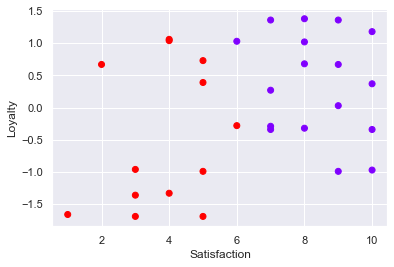

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [10]:
# we can see that we have a imaginary cutoff line at satisfaction level 6. 
# this solution may make sense to some but mp the algo only considered satisfaction as a feature.

# this is because we didt standardize the data. Satisfaction has much higher values than those of loyalty hence kmeans
# rejected it.

# whenever we cluster on the basis of a single feature, the result looks like this graph
# whenever we see this line we should look for something fishy going on.

## Standardize the variables

In [11]:
# sklearn.preprocessing.scale(x) scales (standardizes with mean 0 and standard deviation of 1 by default) each variable (column)
# seperately.
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

# it contains new values for satisfaction and same valus for loyalty because it was already standardized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Taking advantage of the elboww method

Clustering is about minimizing the distance between points in a cluster and maximizing the distance between the ckusters.
In KMEANS these two occur simultaneously.
Distance between point in a cluster is WCSS(within cluster sum of squares). If we minimise the WCSS we have a perfect clustering solution.

In [12]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.348079410290981,
 4.315662464700004,
 3.877452866866016]

<function matplotlib.pyplot.show(close=None, block=None)>

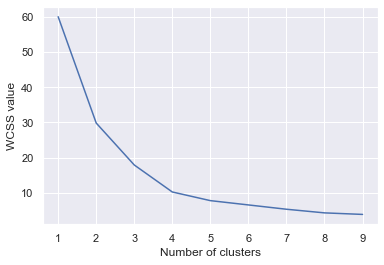

In [13]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.ylabel('WCSS value')
plt.xlabel('Number of clusters')
plt.show

#### ABOVE graph is called the elbow graph which gives us the optimal number of clusters we select the cluster number where the WCSS value stops decreasing significantly. Here it is happening at 4.

## Explore clustering solutions and select the number of cluster

In [14]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [15]:
clusters_new

,Satisfaction,Loyalty,Clusters_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

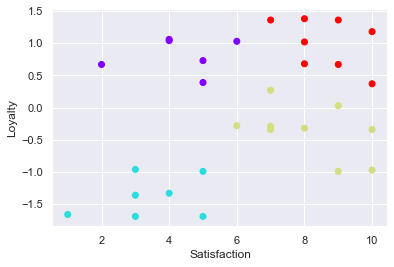

In [16]:
# we will plot the data without standardizing the AXES but the solution will be the standardized one.
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['Clusters_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')s

In [17]:
# keeping the orginal x axis we get an intuition for how satisfied were the customers
# we often choose to plot using the original valyes for clear interpretability.
# NOTE: the discrepancy we observe here depends on the range of axes, too.